In [1]:
import matplotlib.pyplot as plt
import numpy as np

def apply_formatting(dpi=1000, one_column=True, font_size=10, third_height=False):
    FIGURE_WIDTH_1COL = 3.404  # For PRX style, change for according to journal
    FIGURE_WIDTH_2COL = 7.057  # For PRX style, change for according to journal

    FIGURE_WIDTH_1COL = 140/25.4 # For Thesis style
    FIGURE_WIDTH_2COL = 140/25.4 / 2 # For Thesis style
    FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL*2/(1 + np.sqrt(5)) # Golden ratio
    FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5)) # Golden ratio
    FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5)) * 1.5 # Golden ratio
    FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL * 1.25

    if third_height == True:
        FIGURE_HEIGHT_1COL_GR = FIGURE_HEIGHT_1COL_GR * 1.5
        FIGURE_HEIGHT_2COL_GR = FIGURE_HEIGHT_2COL_GR *1.5

    # font_size = font_size if one_column else font_size//1.5
    font_size = font_size if one_column else font_size * 1.2
    legend_font_size = font_size//1.5 if one_column else font_size//1.8

    figsize = (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR) if one_column else (FIGURE_WIDTH_2COL, FIGURE_HEIGHT_2COL_GR)

    plt.rcParams.update({
        'text.usetex'         : True,
        'text.latex.preamble' : r'\usepackage{mathpazo}',
        'font.family'         : 'serif',
        # 'font.serif'          : ['IBM Plex Sans'],
        'font.size'           : font_size,  
        'figure.titlesize'    : 'medium',
        'figure.dpi'          : dpi,
        'figure.figsize'      : figsize,
        'axes.titlesize'      : 'medium',
        'axes.axisbelow'      : True,
        'xtick.direction'     : 'in',
        'xtick.labelsize'     : 'small',
        'ytick.direction'     : 'in',
        'ytick.labelsize'     : 'small',
        'image.interpolation' : 'none',
        # 'legend.fontsize'     : legend_font_size,
        'legend.fontsize'     : font_size,
        'axes.labelsize'      : font_size,
        'axes.titlesize'      : font_size,
        'xtick.labelsize'     : font_size,
        'ytick.labelsize'     : font_size,
    })

C:\Users\imb-j\AppData\Local\Temp\ipykernel_25500\2892958489.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.03)


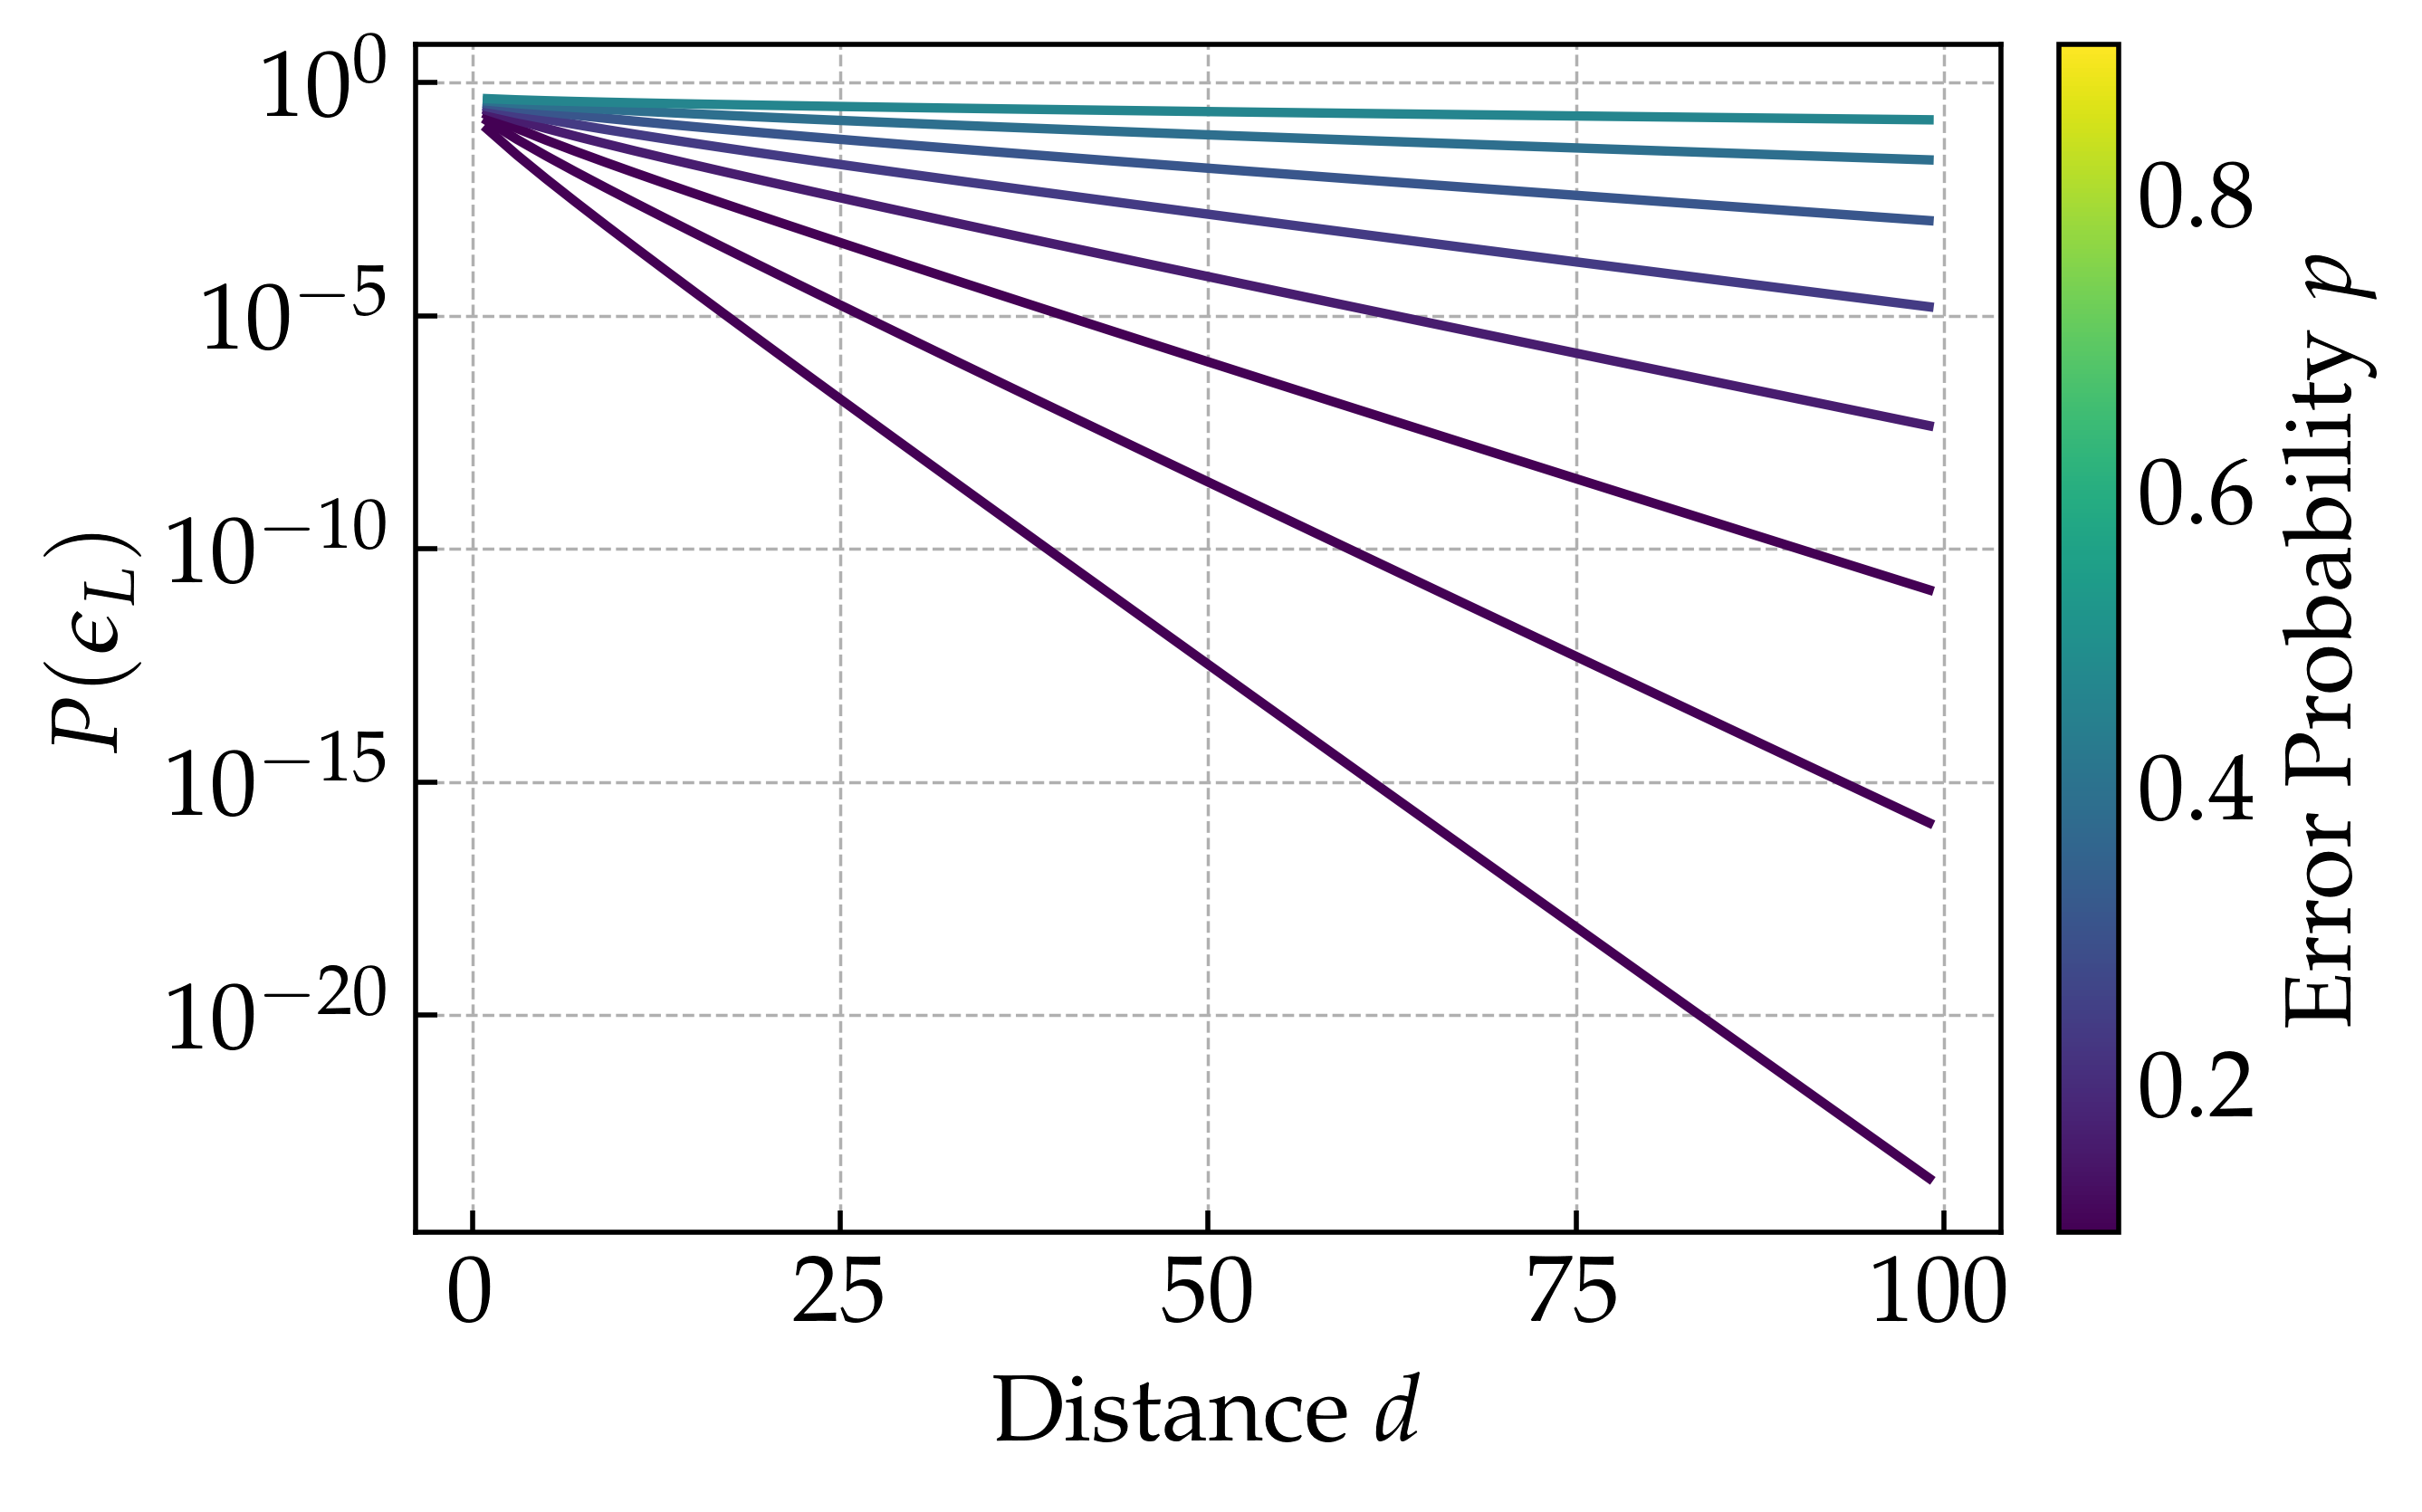

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

def logical_error_rate(n, p):
    """Calculate the logical error rate for a repetition code with codeword length n and error rate p."""
    k = np.ceil(n / 2)  # Majority threshold
    # Calculate the probability of more than k errors
    error_prob = binom.sf(k-1, n, p)  # Survival function (1 - CDF) of the binomial distribution
    return error_prob

# Codeword lengths to consider
n_values = range(1, 101, 2)  # Use odd values of n for a clear majority

# Different probabilities of error
p_values = np.arange(0.1, 0.9, 0.05)

# Prepare the plot
plt.figure()
apply_formatting(font_size=15, dpi=500)

# Color mapping with enhanced contrast
cm = plt.get_cmap('viridis')
color_range = cm(np.linspace(-0.2, 1.2, len(p_values)))  # Adjusted for stronger contrast


p_values = np.arange(0.1, 0.5, 0.05)
plt.yscale('log')

for idx, p in enumerate(p_values):
    error_rates = [logical_error_rate(n, p) for n in n_values]
    plt.plot(n_values, error_rates, color=color_range[idx], label=f'p = {p:.2f}')

plt.xlabel('Distance $d$')
plt.ylabel(r'$P(\epsilon_L)$')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add a horizontal colorbar above the plot
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.03)
cbar.set_label('Error Probability $p$')

plt.show()
